## Pregunta 1: Ley de Zpif

In [129]:
#ref https://www.geeksforgeeks.org/zipfs-law/#python-implementation-of-zipfs-law
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd

In [130]:
# Cargar dataset - Cambia 'test' por 'train' para usar el dataset de entrenamiento
dataset_type = 'train'  # Opciones: 'test' o 'train'

if dataset_type == 'test':
    file_path = './test_sent_emo.csv'
elif dataset_type == 'train':
    file_path = './train_sent_emo.csv'

# Leer el archivo CSV con diferentes codificaciones hasta encontrar una que funcione
encodings_to_try = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
df = None

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Archivo leído exitosamente con codificación: {encoding}")
        break
    except UnicodeDecodeError:
        continue

if df is None:
    raise ValueError("No se pudo leer el archivo con ninguna codificación probada")

# Extraer el texto de la columna 'Utterance' y concatenarlo
text = ' '.join(df['Utterance'].astype(str))

# Diccionario para corregir caracteres mal codificados comunes
char_corrections = {
    '\x91': "'",  # left single quotation mark
    '\x92': "'",  # right single quotation mark
    '\x93': '"',  # left double quotation mark
    '\x94': '"',  # right double quotation mark
    '\x96': '-',  # en dash
    '\x97': '--', # em dash
    '\x85': '...', # horizontal ellipsis
    '\xa0': ' ',  # non-breaking space
    '\x80': '€',  # euro sign
    '\x82': ',',  # single low-9 quotation mark
    '\x83': 'f',  # latin small letter f with hook
    '\x84': '"',  # double low-9 quotation mark
    '\x86': '†',  # dagger
    '\x87': '‡',  # double dagger
    '\x88': '^',  # modifier letter circumflex accent
    '\x89': '‰',  # per mille sign
    '\x8a': 'Š',  # latin capital letter s with caron
    '\x8b': '<',  # single left-pointing angle quotation mark
    '\x8c': 'Œ',  # latin capital ligature oe
    '\x8e': 'Ž',  # latin capital letter z with caron
    '\x8f': '',   # control character
    '\x90': '',   # control character
    '\x95': '•',  # bullet
    '\x98': '~',  # small tilde
    '\x99': '™',  # trade mark sign
    '\x9a': 'š',  # latin small letter s with caron
    '\x9b': '>',  # single right-pointing angle quotation mark
    '\x9c': 'œ',  # latin small ligature oe
    '\x9e': 'ž',  # latin small letter z with caron
    '\x9f': 'Ÿ'   # latin capital letter y with diaeresis
}

# Aplicar correcciones
for bad_char, good_char in char_corrections.items():
    text = text.replace(bad_char, good_char)

# Normalizar caracteres Unicode después de las correcciones
import unicodedata
text = unicodedata.normalize('NFKD', text)

print(f"Dataset cargado: {dataset_type}")
print(f"Número de utterances: {len(df)}")
print(f"Primeras 200 caracteres del texto:")
print(text[:200] + "...")

Archivo leído exitosamente con codificación: utf-8
Dataset cargado: train
Número de utterances: 9989
Primeras 200 caracteres del texto:
also I was the point person on my company’s transition from the KL-5 to GR-6 system. You must’ve had your hands full. That I did. That I did. So let’s talk a little bit about your duties. My duties?  ...


In [131]:
textList = re.findall(r'\b[a-zA-Z]+\b', text)

In [132]:
#inicializando
textDict = {}
wordFrequency={}

#Frecuencia de palabras
for txt in textList:
  if txt in textDict.keys():
    textDict[txt]+=1
  else:
    textDict[txt]=1

print(textDict)

{'also': 19, 'I': 4479, 'was': 469, 'the': 1763, 'point': 9, 'person': 21, 'on': 496, 'my': 602, 'company': 5, 's': 1856, 'transition': 1, 'from': 106, 'KL': 1, 'to': 1621, 'GR': 1, 'system': 7, 'You': 601, 'must': 26, 've': 216, 'had': 135, 'your': 373, 'hands': 10, 'full': 8, 'That': 275, 'did': 167, 'So': 285, 'let': 112, 'talk': 65, 'a': 1537, 'little': 134, 'bit': 19, 'about': 330, 'duties': 3, 'My': 58, 'All': 201, 'right': 433, 'Now': 85, 'you': 2985, 'll': 287, 'be': 443, 'heading': 3, 'whole': 37, 'division': 2, 'so': 419, 'have': 577, 'lot': 61, 'of': 646, 'see': 200, 'But': 162, 'there': 309, 'perhaps': 2, 'people': 93, 'under': 18, 'can': 485, 'dump': 6, 'certain': 2, 'amount': 1, 'them': 107, 'Good': 49, 'know': 827, 'We': 184, 'go': 350, 'into': 50, 'detail': 1, 'No': 523, 'don': 498, 't': 1195, 'beg': 2, 'then': 133, 'we': 615, 'definite': 1, 'answer': 10, 'for': 470, 'Monday': 4, 'but': 286, 'think': 297, 'say': 131, 'with': 445, 'some': 144, 'confidence': 1, 'fit': 4, 

In [133]:
#Ordenando por frecuencia de palabras, en orden descendente
wordFrequency = dict(
        sorted(
            textDict.items(),
            key=lambda x: x[1],
            reverse=True)
        )
print(wordFrequency)

{'I': 4479, 'you': 2985, 's': 1856, 'the': 1763, 'to': 1621, 'a': 1537, 'it': 1353, 't': 1195, 'that': 1178, 'Oh': 1052, 'and': 994, 'm': 852, 'know': 827, 'me': 724, 'is': 721, 'of': 646, 'just': 633, 'this': 632, 'in': 621, 'we': 615, 'my': 602, 'You': 601, 're': 578, 'have': 577, 'No': 523, 'Yeah': 520, 'what': 510, 'Okay': 508, 'don': 498, 'on': 496, 'do': 489, 'can': 485, 'for': 470, 'was': 469, 'Hey': 467, 'What': 463, 'not': 459, 'with': 445, 'be': 443, 'right': 433, 'are': 427, 'Well': 420, 'so': 419, 'no': 405, 'your': 373, 'gonna': 365, 'like': 357, 'go': 350, 'out': 350, 'he': 346, 'get': 342, 'here': 340, 'about': 330, 'It': 323, 'there': 309, 'up': 306, 'think': 297, 'all': 290, 'll': 287, 'but': 286, 'So': 285, 'That': 275, 'her': 271, 'And': 267, 'really': 263, 'at': 262, 'one': 262, 'got': 255, 'she': 247, 'mean': 243, 'if': 230, 'Ross': 222, 'they': 221, 've': 216, 'him': 216, 'uh': 213, 'want': 205, 'All': 201, 'see': 200, 'God': 195, 'Joey': 192, 'now': 190, 'y': 187

In [134]:
print(wordFrequency)

{'I': 4479, 'you': 2985, 's': 1856, 'the': 1763, 'to': 1621, 'a': 1537, 'it': 1353, 't': 1195, 'that': 1178, 'Oh': 1052, 'and': 994, 'm': 852, 'know': 827, 'me': 724, 'is': 721, 'of': 646, 'just': 633, 'this': 632, 'in': 621, 'we': 615, 'my': 602, 'You': 601, 're': 578, 'have': 577, 'No': 523, 'Yeah': 520, 'what': 510, 'Okay': 508, 'don': 498, 'on': 496, 'do': 489, 'can': 485, 'for': 470, 'was': 469, 'Hey': 467, 'What': 463, 'not': 459, 'with': 445, 'be': 443, 'right': 433, 'are': 427, 'Well': 420, 'so': 419, 'no': 405, 'your': 373, 'gonna': 365, 'like': 357, 'go': 350, 'out': 350, 'he': 346, 'get': 342, 'here': 340, 'about': 330, 'It': 323, 'there': 309, 'up': 306, 'think': 297, 'all': 290, 'll': 287, 'but': 286, 'So': 285, 'That': 275, 'her': 271, 'And': 267, 'really': 263, 'at': 262, 'one': 262, 'got': 255, 'she': 247, 'mean': 243, 'if': 230, 'Ross': 222, 'they': 221, 've': 216, 'him': 216, 'uh': 213, 'want': 205, 'All': 201, 'see': 200, 'God': 195, 'Joey': 192, 'now': 190, 'y': 187

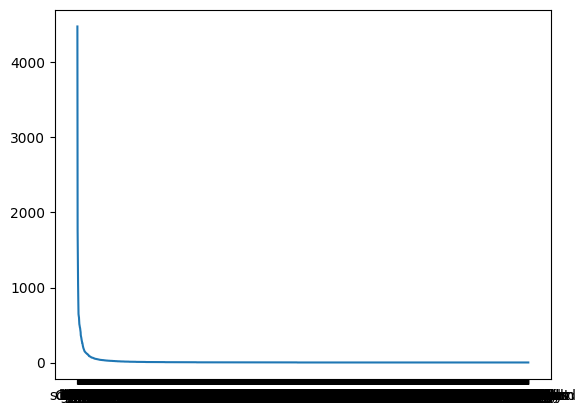

In [135]:
plt.plot(wordFrequency.keys(), wordFrequency.values())

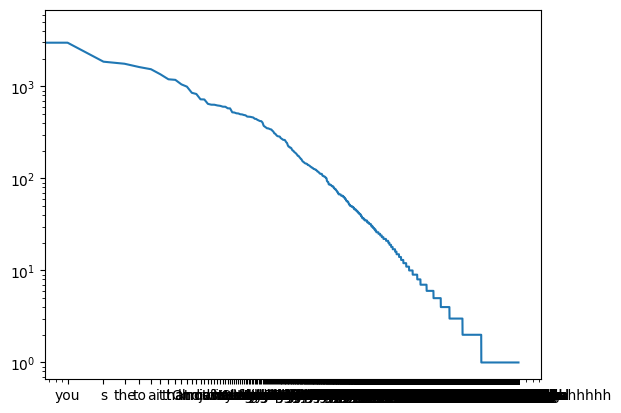

In [136]:
plt.loglog(wordFrequency.keys(), wordFrequency.values())

In [137]:
#Define two lists, rank and frequency
rank = []
frequency = []
init = 0

#Assign ranks based on frequencies of words
for freq in wordFrequency.values():
  init+=1
  rank.append(init)
  frequency.append(freq)

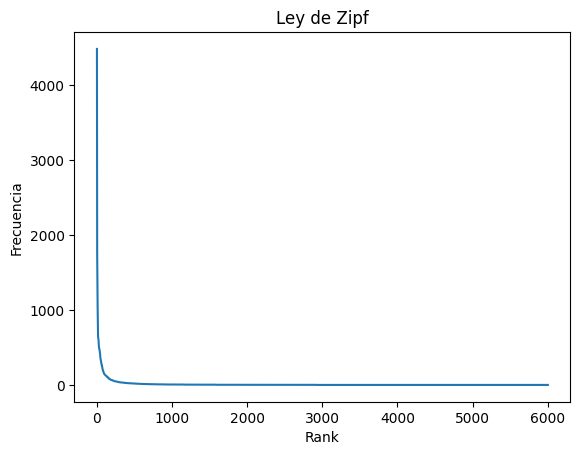

In [138]:
plt.plot(rank,frequency)
#plt.loglog(rank,frequency)

plt.xlabel('Rank')

plt.ylabel('Frecuencia')
plt.title("Ley de Zipf")

plt.show()

## Pregunta 2: Concluir a raíz del gráfico

En los gráficos se nota súper claro el patrón de la Ley de Zipf: hay poquitas palabras que se repiten muchísimo (como you, the, it, to), y después la frecuencia baja rapidísimo hasta que la mayoría de palabras aparecen muy poco. Esto quiere decir que el dataset está lleno de palabras funcionales y muletillas, mientras que las palabras con más contenido aparecen mucho menos.

Si lo pensamos desde Text Mining, esto es lo esperado en cualquier texto: siempre hay que limpiar esas palabras comunes (stopwords) para que no opaquen a las demás. Además, el gráfico nos muestra que lo más interesante suele estar en esas palabras que aparecen poco, porque son las que ayudan a diferenciar temas o contextos. O sea, el dataset sí cumple con la Ley de Zipf y justamente por eso creo que es posible aplicar técnicas como TF-IDF para sacarle partido a la info más relevante.

In [139]:
# Instalación de librerías necesarias
!apt-get install -y libenchant-2-2
!pip install pandas nltk pyenchant wordcloud matplotlib seaborn ftfy unidecode scikit-learn

import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import enchant
from collections import Counter
import ftfy
from unidecode import unidecode
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Descargar recursos NLTK
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libenchant-2-2 is already the newest version (2.3.2-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

/tmp/ipython-input-1670503205.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Emotion", y="avg_word_len", palette="viridis")


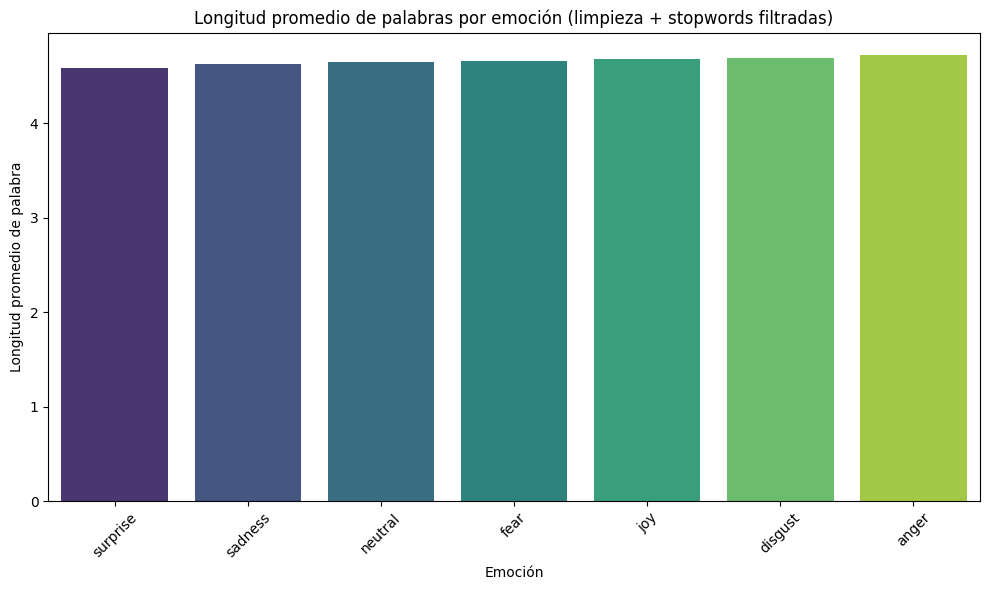


📊 Resultados de longitud promedio por emoción:
    Emotion  avg_word_len
6  surprise      4.580520
5   sadness      4.629545
4   neutral      4.646931
2      fear      4.654886
3       joy      4.678625
1   disgust      4.693525
0     anger      4.719071


In [140]:
# ==========================================================
# Script de análisis de longitud de palabras por emoción
# Dataset: columnas "Utterance" (texto) y "Emotion" (etiqueta)
#
# Incluye:
# - Limpieza de texto con ftfy y Unidecode
# - Filtrado de stopwords (scikit-learn) con palabras protegidas
# - Cálculo de longitud promedio de palabras por emoción
# - Visualización con barplot
# ==========================================================

# ==========================================================
# Definir stopwords personalizadas
# ==========================================================
stopwords_to_remove = set(ENGLISH_STOP_WORDS)
protected_words = {"no","not","never","nor","oh","wow","why","what","hey"}

# ==========================================================
# Funciones de preprocesamiento y análisis
# ==========================================================
def clean_text(text):
    """Corrige errores de codificación y normaliza Unicode."""
    if pd.isna(text) or not isinstance(text, str):
        return ""
    text = ftfy.fix_text(text)       # corrige mojibake y comillas raras
    text = unidecode(text)           # convierte caracteres Unicode a ASCII
    return text

def tokenize(text):
    """Tokeniza un texto básico, quitando puntuación."""
    text = clean_text(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.lower().split()
    return tokens

def filter_tokens(tokens):
    """Filtra stopwords, manteniendo palabras protegidas."""
    return [t for t in tokens if (t not in stopwords_to_remove or t in protected_words)]

def average_word_length(tokens):
    """Calcula longitud promedio de un conjunto de palabras."""
    if not tokens:
        return None
    return sum(len(w) for w in tokens) / len(tokens)

def analyze_emotions(csv_path):
    # Leer dataset
    df = pd.read_csv(csv_path)

    if "Utterance" not in df.columns or "Emotion" not in df.columns:
        raise ValueError("El CSV debe contener columnas 'Utterance' y 'Emotion'.")

    # Procesar cada Utterance
    df["tokens"] = df["Utterance"].apply(tokenize).apply(filter_tokens)
    df["avg_word_len"] = df["tokens"].apply(average_word_length)

    # Calcular promedio por emoción
    results = df.groupby("Emotion")["avg_word_len"].mean().reset_index()
    results = results.sort_values("avg_word_len")

    # ==========================================================
    # Visualización
    # ==========================================================
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results, x="Emotion", y="avg_word_len", palette="viridis")
    plt.title("Longitud promedio de palabras por emoción (limpieza + stopwords filtradas)")
    plt.ylabel("Longitud promedio de palabra")
    plt.xlabel("Emoción")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results

# Ejecución del análisis
# Reemplaza "test_sent_emo.csv" por el nombre de tu archivo cargado.
output = analyze_emotions("./train_sent_emo.csv")

print("\n📊 Resultados de longitud promedio por emoción:")
print(output)


## Pregunta 3: Implementacion tres características del texto

In [141]:
# Instalación de librerías necesarias
!apt-get install -y libenchant-2-2
!pip install pandas nltk pyenchant wordcloud matplotlib seaborn ftfy unidecode scikit-learn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libenchant-2-2 is already the newest version (2.3.2-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [142]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import enchant
from collections import Counter
import ftfy
from unidecode import unidecode
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Descargar recursos NLTK
nltk.download("punkt")
try:
    nltk.download("averaged_perceptron_tagger_eng")
except:
    nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libenchant-2-2 is already the newest version (2.3.2-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 132.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


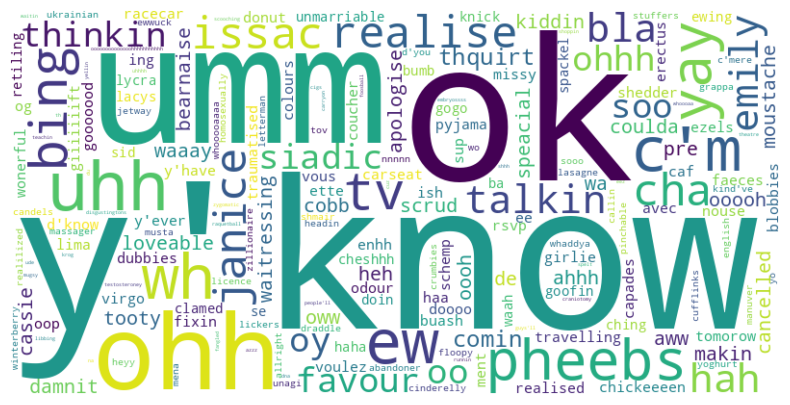

Porcentaje de registros con palabras informales: 6.62 %

Ejemplos de textos con palabras informales:
     row_index                                      original_text  \
359       5611  Maybe one of those stories would make me cry a...   
502       7617              $500 that is a loooot of electricity!   
417       6452                                   So umm, does it?   
210       3100                        You said I was boring--Ohh!   
584       9055  Welcome to introduction to cooking. Now, befor...   

             informal_words  
359                  y'know  
502                  loooot  
417                     umm  
210                     ohh  
584  hollandaise, bearnaise  

Frecuencia de palabras informales:
       word  frequency
0    y'know        126
1        ok        114
2       umm         78
3       ohh         41
4       uhh         12
5        ew         10
6        wh         10
7       c'm         10
8       yay          8
9    pheebs          8
10       tv    

,row_index,original_text,informal_words
0,18,Ok!,ok
1,100,"Um, absolutely. Uh, how 'bout tomorrow afterno...",ish
2,102,Ok. Ok. Having a phone has finally paid off.,"ok, ok"
3,103,"Even though you do do a good Bob impression, I...","thinkin, tomorow"
4,106,"Ok, pure evil , horny and alone . I've done this",ok
5,114,"All right, y’know what? We really are late! Le...",y'know
6,150,"Joey is a great guy, but we're just... so diff...",erectus
7,153,"Hey, you ok?",ok
8,161,"Ok, gentlemen!",ok
9,170,Oy!!,oy


In [143]:
# SETUP & DEPENDENCIAS

!apt-get install -y libenchant-2-2
!pip install pandas nltk pyenchant wordcloud matplotlib seaborn ftfy unidecode scikit-learn spacy contractions
!python -m spacy download en_core_web_sm


# IMPORTS
import pandas as pd
import re
import ftfy
import unidecode
import contractions
import enchant
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# CONFIGURACIÓN
nlp = spacy.load("en_core_web_sm")
english_dict = enchant.Dict("en_US")

# Lista interna de palabras informales / slang
SLANG_LIST = [
    'gonna', 'wanna', 'ain’t', 'bruh', 'idk', 'smh', 'lol', 'btw', 'omg', 'thx',
    'cuz', 'lemme', 'yall', 'sup', 'yo', 'nah', 'innit', 'bro', 'sis'
]

# Stopwords protegidas
PROTECTED_WORDS = {"no", "not", "never", "nor", "oh", "wow", "why", "what", "hey"}

# Regex para tokenización que conserva contracciones
TOKEN_PATTERN = re.compile(r"[A-Za-z]+(?:'[A-Za-z]+)?")

# LIMPIEZA & NORMALIZACIÓN
def clean_text(text):
    if pd.isna(text):
        return ""
    text = ftfy.fix_text(text)  # Corrige mojibake
    text = text.replace("’", "'").replace("“", '"').replace("”", '"')  # Normaliza comillas
    text = re.sub(r"[\u200b-\u200d\uFEFF]", "", text)  # Quita invisibles
    text = unidecode.unidecode(text)  # Normaliza a ASCII
    return text

# TOKENIZACIÓN + POS/NER
def tokenize_and_filter(text):
    text = contractions.fix(text)  # Expande contracciones estándar
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.pos_ == "PROPN":
            continue
        if token.ent_type_ in {"PERSON", "NORP"}:
            continue
        if token.is_stop and token.text.lower() not in PROTECTED_WORDS:
            continue
        if token.like_num or token.is_space:
            continue
        # Aplica regex personalizada
        if not TOKEN_PATTERN.fullmatch(token.text):
            continue
        tokens.append(token.text.lower())
    return tokens


# LÓGICA DE INFORMALIDAD
def is_informal(word):
    if word in SLANG_LIST:
        return True
    try:
        if not english_dict.check(word):
            return True
    except:
        return True
    return False


# ANÁLISIS PRINCIPAL
def analyze_dataset(csv_path, text_column="Utterance"):
    df = pd.read_csv(csv_path)
    detailed_rows = []
    informal_counter = {}

    for idx, row in df.iterrows():
        original_text = str(row[text_column]) if text_column in row else ""
        cleaned = clean_text(original_text)
        tokens = tokenize_and_filter(cleaned)

        informals = [w for w in tokens if is_informal(w)]
        if informals:
            detailed_rows.append({
                "row_index": idx,
                "original_text": original_text,
                "informal_words": ", ".join(informals)
            })
            for w in informals:
                informal_counter[w] = informal_counter.get(w, 0) + 1

    detailed_df = pd.DataFrame(detailed_rows)

    # Porcentaje de registros con palabras informales
    percentage = (len(detailed_df) / len(df)) * 100 if len(df) > 0 else 0

    # Ejemplos aleatorios
    examples = detailed_df.sample(min(5, len(detailed_df))) if len(detailed_df) > 0 else pd.DataFrame()

    # Tabla de frecuencias
    freq_df = pd.DataFrame(sorted(informal_counter.items(), key=lambda x: x[1], reverse=True),
                           columns=["word", "frequency"])

    # Nube de palabras
    if informal_counter:
        wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(informal_counter)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    # Guardar resultados
    detailed_df.to_csv("informal_words_detailed.csv", index=False)

    # Mostrar resultados
    print("Porcentaje de registros con palabras informales:", round(percentage, 2), "%")
    print("\nEjemplos de textos con palabras informales:")
    print(examples[["row_index", "original_text", "informal_words"]])
    print("\nFrecuencia de palabras informales:")
    print(freq_df.head(20))

    return percentage, detailed_df, freq_df


# EJECUCIÓN

# Cambia 'test_sent_emo.csv' y 'Utterance' según tu dataset
percentage, detailed_df, freq_df = analyze_dataset("./train_sent_emo.csv", text_column="Utterance")

# Mostrar DataFrame detallado directamente en Colab
detailed_df.head(20)


In [144]:
try:
    from google.colab import sheets
    sheet = sheets.InteractiveSheet(df=detailed_df)
except Exception:
    try:
        import pandas as pd
        sheet = pd.read_csv("InteractiveSheet.csv")
        print(sheet.head())
    except Exception as e:
        print("No se pudo abrir ni InteractiveSheet ni el CSV:", e)

   row_index                                      original_text  \
0         18                                                Ok!   
1        100  Um, absolutely. Uh, how 'bout tomorrow afterno...   
2        102      Ok.  Ok. Having a phone has finally paid off.   
3        103  Even though you do do a good Bob impression, I...   
4        106   Ok, pure evil , horny and alone . I've done this   

     informal_words  
0                ok  
1               ish  
2            ok, ok  
3  thinkin, tomorow  
4                ok  


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Resumen detección de contracciones (solo detección, sin expansión)
Filas totales: 9989
Filas con ≥1 contracción: 3810 (38.14%)

Top contracciones (si hay):
contraction  frequency
        i'm        790
       it's        574
      don't        546
     that's        385
     you're        335
      can't        206
       i'll        156
      we're        147
       he's        143
     didn't        127
       i've        111
      she's        103
     what's         95
    there's         88
      let's         87
    they're         80
    doesn't         64
        i'd         52
      we'll         50
      won't         41


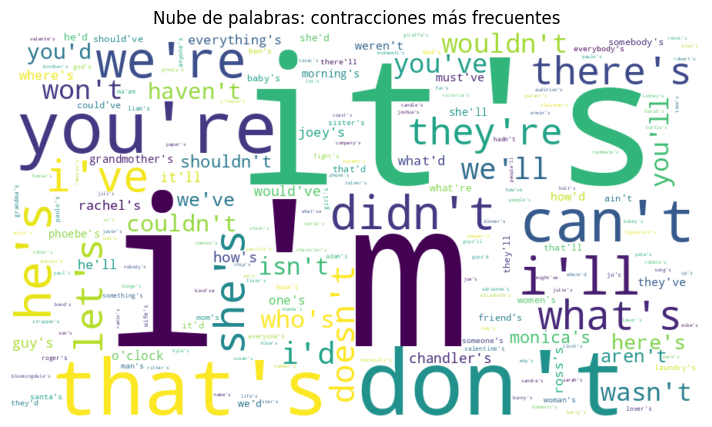


Exportado: contractions_detected.csv


In [145]:
# Instalación en Colab
!apt-get -y update >/dev/null
!pip -q install ftfy Unidecode spacy contractions wordcloud matplotlib scikit-learn pandas chardet

# Modelo de spaCy
import sys, subprocess
try:
    import en_core_web_sm  # noqa
except Exception:
    !python -m spacy download en_core_web_sm

# Imports
import re
import unicodedata
import chardet
import pandas as pd
import numpy as np
import ftfy
from unidecode import unidecode
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import contractions as contractions_lib  # ✅ detector principal


# Carga de spaCy

nlp = spacy.load("en_core_web_sm", disable=["lemmatizer"])
nlp.enable_pipe("ner")


# Conjuntos y patrones
PROTECTED_WORDS = {"no", "not", "never", "nor", "oh", "wow", "why", "what", "hey"}
BASE_STOPWORDS = set(ENGLISH_STOP_WORDS) - PROTECTED_WORDS

# Tokens con apóstrofe interno (p.ej., don't, they've)
TOKEN_AP_PATTERN = re.compile(r"[A-Za-z]+(?:'[A-Za-z]+)+")
WORD_PATTERN = re.compile(r"[A-Za-z]+")

# Respaldo: sufijos típicos de contracción (si `contractions` no detecta alguna)
CONTRACTION_SUFFIXES = ("n't", "'re", "'ve", "'ll", "'d", "'s", "'m")

# Invisibles y comillas/apóstrofes Unicode → ASCII
INVISIBLE_CHARS_PATTERN = re.compile(r"[\u200B-\u200D\u2060\uFEFF]")
APOSTROPHES = { "\u2019": "'", "\u2018": "'", "\u02BC": "'", "\u2032": "'", "\uFF07": "'" }
QUOTES     = { "\u201C": '"', "\u201D": '"', "\u2033": '"', "\uFF02": '"' }

# Normalización
def normalize_text(text: str) -> str:
    if not isinstance(text, str):
        text = "" if text is None else str(text)
    text = ftfy.fix_text(text)  # corrige mojibake/encoding
    for bad, good in {**APOSTROPHES, **QUOTES}.items():
        text = text.replace(bad, good)
    text = INVISIBLE_CHARS_PATTERN.sub("", text)
    text = unicodedata.normalize("NFKC", text)
    text = unidecode(text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Tokenización
def tokenize_preserve_apostrophes(text: str):
    tokens_ap = TOKEN_AP_PATTERN.findall(text)     # candidatos a contracción
    tokens_words = WORD_PATTERN.findall(text)      # palabras simples
    return tokens_ap, tokens_words


# Filtros spaCy: PROPN, PERSON, NORP
def spacy_filter_tokens(text: str, candidate_tokens: list[str]) -> list[str]:
    if not candidate_tokens:
        return candidate_tokens
    doc = nlp(text)
    ents_text_types = {ent.text: ent.label_ for ent in doc.ents if ent.label_ in {"PERSON", "NORP"}}
    filtered = []
    for tok in candidate_tokens:
        if tok in ents_text_types:
            continue
        if any(t.text == tok and t.pos_ == "PROPN" for t in doc):
            continue
        filtered.append(tok)
    return filtered


# Detección de contracciones
def detect_with_contractions_lib(token: str) -> bool:
    """
    Detector principal basado en la librería `contractions`.
    Estrategia: si contractions.fix(token) cambia el token, lo consideramos contracción.
    (No devolvemos la expansión porque SOLO queremos detectar, no expandir.)
    """
    fixed = contractions_lib.fix(token)
    # Comparación case-insensitive y strip para evitar falsos positivos por casing
    return fixed.strip().lower() != token.strip().lower()

def detect_with_suffix_backup(token: str) -> bool:
    """ Respaldo simple cuando la librería no señaliza algún caso. """
    lower = token.lower()
    return "'" in token and lower.endswith(CONTRACTION_SUFFIXES)

def is_contraction(token: str) -> bool:
    # Primero la librería (más robusta)
    if detect_with_contractions_lib(token):
        return True
    # Respaldo por sufijos típicos
    return detect_with_suffix_backup(token)


# Análisis principal
def analyze_contractions(csv_path: str, text_column: str, sample_examples: int = 10, encoding_hint: str | None = None):
    # Detección de encoding
    if encoding_hint:
        encoding = encoding_hint
    else:
        with open(csv_path, "rb") as f:
            raw = f.read(1000000)
        guess = chardet.detect(raw)
        encoding = guess.get("encoding") or "utf-8"

    # Carga DataFrame
    df = pd.read_csv(csv_path, encoding=encoding)
    if text_column not in df.columns:
        raise ValueError(f"La columna '{text_column}' no existe en el CSV. Columnas: {list(df.columns)}")

    # Normalización
    df["_text_norm"] = df[text_column].astype(str).map(normalize_text)

    # Detección por fila
    records = []
    rows_with_contractions = 0

    for idx, text in enumerate(df["_text_norm"].tolist()):
        tokens_ap, tokens_words = tokenize_preserve_apostrophes(text)

        # Filtrado spaCy (PERSON/NORP/PROPN) aplicado solo a candidatos con apóstrofe
        tokens_ap = spacy_filter_tokens(text, tokens_ap)

        # Stopwords solo para análisis complementario (no afectan detección)
        tokens_words = [t for t in tokens_words if t.lower() not in BASE_STOPWORDS]

        detected_here = []
        for tok in tokens_ap:
            if is_contraction(tok):
                detected_here.append(tok)

        if detected_here:
            rows_with_contractions += 1
            for tok in detected_here:
                records.append({
                    "row_index": idx,
                    "original_text": df[text_column].iloc[idx],
                    "normalized_text": text,
                    "contraction": tok,         # solo detectamos
                    "expanded": None            # no expandimos (se deja explícitamente en None)
                })

    detailed_df = pd.DataFrame.from_records(records)
    pct_rows = (rows_with_contractions / len(df)) * 100 if len(df) else 0.0

    # Frecuencias
    if not detailed_df.empty:
        counts = Counter(detailed_df["contraction"].str.lower())
        freq_df = pd.DataFrame(counts.items(), columns=["contraction", "frequency"]).sort_values(
            "frequency", ascending=False
        )
    else:
        freq_df = pd.DataFrame(columns=["contraction", "frequency"])

    # Ejemplos
    examples_df = pd.DataFrame(columns=[text_column])
    if not detailed_df.empty:
        first_rows = (
            detailed_df.groupby("row_index")
            .first()
            .reset_index()
            .sort_values("row_index")
            .head(sample_examples)
        )
        examples_df = df.loc[first_rows["row_index"], [text_column]].reset_index(drop=True)

    # Salidas
    print("=======================================")
    print("Resumen detección de contracciones (solo detección, sin expansión)")
    print("=======================================")
    print(f"Filas totales: {len(df)}")
    print(f"Filas con ≥1 contracción: {rows_with_contractions} ({pct_rows:.2f}%)")
    print("\nTop contracciones (si hay):")
    if not freq_df.empty:
        print(freq_df.head(20).to_string(index=False))
    else:
        print("No se detectaron contracciones.")

    # Nube de palabras (si hay frecuencia)
    if not freq_df.empty:
        wc = WordCloud(width=900, height=500, background_color="white")
        wc.generate_from_frequencies(dict(zip(freq_df["contraction"], freq_df["frequency"])))

        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title("Nube de palabras: contracciones más frecuentes")
        plt.show()

    # Exportar CSV detallado
    detailed_df.to_csv("contractions_detected.csv", index=False)
    print("\nExportado: contractions_detected.csv")

    return {
        "percentage_rows_with_contractions": pct_rows,
        "examples_df": examples_df,
        "freq_df": freq_df,
        "detailed_df": detailed_df,
    }


# Ejemplo de uso
results = analyze_contractions("./train_sent_emo.csv", text_column="Utterance")
#results = analyze_contractions("tu_archivo.csv", text_column="text")


## Pregunta 4: Para cada etiqueta del dataset y para cada característica implementada.

- ¿Qué puede concluir?    
- ¿Qué  patrones  caracterizan  cada  etiqueta  del  dataset?  
- Presente  al  menos  5 ejemplos por cada característica/etiqueta.








In [146]:
import re
import pandas as pd

In [147]:
# Hotfix: asegura que clean_text vea un objeto con atributo .unidecode
try:
    import unidecode as _unidecode_mod  # módulo
    if 'unidecode' not in globals() or not hasattr(globals()['unidecode'], 'unidecode'):
        globals()['unidecode'] = _unidecode_mod
except Exception:
    try:
        from unidecode import unidecode as _unidecode_func  # función
        class _UniShim:
            def __init__(self, f): self.unidecode = f
        globals()['unidecode'] = _UniShim(_unidecode_func)
    except Exception:
        pass

In [148]:
_csv_path = file_path if "file_path" in globals() else "./train_sent_emo.csv"

In [149]:
# Carga robusta de CSV (se respeta el encoding usado antes si aplica)
_encodings_to_try = ["utf-8", "latin-1", "iso-8859-1", "cp1252"]
_df_loaded = None
for _enc in _encodings_to_try:
    try:
        _df_loaded = pd.read_csv(_csv_path, encoding=_enc)
        break
    except Exception:
        continue
if _df_loaded is None:
    raise ValueError(f"No se pudo leer el archivo {_csv_path} con las codificaciones probadas")

In [150]:
# Asegura columnas requeridas
if "Utterance" not in _df_loaded.columns or "Emotion" not in _df_loaded.columns:
    raise ValueError("El CSV debe contener columnas 'Utterance' y 'Emotion'.")

In [151]:
# Se reusa funciones definidas antes; ya que si faltan por ejecución salteada, define fallbacks mínimos:
if "clean_text" not in globals():
    def clean_text(x):
        return "" if pd.isna(x) else str(x)
if "tokenize" not in globals():
    import string
    def tokenize(t):
        t = clean_text(t)
        t = t.translate(str.maketrans("", "", string.punctuation))
        return t.lower().split()
if "filter_tokens" not in globals():
    def filter_tokens(tokens):
        return tokens
if "is_informal" not in globals():
    def is_informal(w):
        return False
if "is_contraction" not in globals():
    def is_contraction(token):
        return bool(re.match(r"[A-Za-z]+(?:'[A-Za-z]+)+$", token))

In [152]:
# Se trabaja con una copia para evitar SettingWithCopyWarning
df4 = _df_loaded.copy()

In [153]:
# Lista de emociones y contenedores de resumen
emotion_labels = sorted(df4["Emotion"].dropna().unique().tolist())
summary_rows = []

In [154]:
def _safe_examples_contains(df_sub: pd.DataFrame, words_set):
    """Devuelve hasta 5 ejemplos que contengan alguna palabra de words_set (regex escapado)."""
    if not words_set:
        return pd.DataFrame(columns=["Utterance"])
    pattern = "|".join(re.escape(w) for w in sorted(words_set))
    try:
        ex = df_sub[df_sub["Utterance"].astype(str).str.contains(pattern, case=False, na=False, regex=True)]
    except Exception:
        # En caso extremo de regex muy largo/complicado, filtra con contains simple
        ex = df_sub[df_sub["Utterance"].astype(str).apply(
            lambda s: any(w.lower() in s.lower() for w in words_set)
        )]
    return ex[["Utterance"]].head(5).reset_index(drop=True)

In [155]:
for emotion in emotion_labels:
    print(f"\n--- Analizando la emoción: '{emotion}' ---")
    emo_df = df4[df4["Emotion"] == emotion].copy()

    # ============== CARACTERÍSTICA 1: Longitud del enunciado (en tokens) ==============
    emo_df["tokens_len"] = (
        emo_df["Utterance"]
        .astype(str)
        .apply(clean_text)
        .apply(tokenize)
        .apply(filter_tokens)
        .apply(len)
    )
    avg_len = float(emo_df["tokens_len"].mean()) if not emo_df.empty else 0.0
    print(f"\n1) Longitud promedio de enunciado: {avg_len:.2f} palabras.")


--- Analizando la emoción: 'anger' ---

1) Longitud promedio de enunciado: 4.40 palabras.

--- Analizando la emoción: 'disgust' ---

1) Longitud promedio de enunciado: 5.03 palabras.

--- Analizando la emoción: 'fear' ---

1) Longitud promedio de enunciado: 4.59 palabras.

--- Analizando la emoción: 'joy' ---

1) Longitud promedio de enunciado: 4.03 palabras.

--- Analizando la emoción: 'neutral' ---

1) Longitud promedio de enunciado: 3.87 palabras.

--- Analizando la emoción: 'sadness' ---

1) Longitud promedio de enunciado: 4.88 palabras.

--- Analizando la emoción: 'surprise' ---

1) Longitud promedio de enunciado: 3.22 palabras.


In [156]:
# Ejemplos: 3 más cortos + 2 más largos (hasta 5 distintos)
shortest = emo_df.sort_values("tokens_len", ascending=True).head(3)[["Utterance", "tokens_len"]]
longest = emo_df.sort_values("tokens_len", ascending=False).head(2)[["Utterance", "tokens_len"]]
examples_len = pd.concat([shortest, longest], axis=0).drop_duplicates().head(5).reset_index(drop=True)

print("   Patrón: enunciados más cortos tienden a emociones intensas/rápidas; los más largos, a contexto/narración.")
print("   Ejemplos (hasta 5):")
if not examples_len.empty:
    for _, r in examples_len.iterrows():
        print(f'      - ({int(r["tokens_len"])} palabras) "{r["Utterance"]}"')
else:
    print("      - No hay ejemplos disponibles.")

   Patrón: enunciados más cortos tienden a emociones intensas/rápidas; los más largos, a contexto/narración.
   Ejemplos (hasta 5):
      - (0 palabras) "Are you serious?"
      - (0 palabras) "Me?"
      - (0 palabras) "She?"
      - (13 palabras) "Ross, I think you misunderstood what I was saying. I just wanted to tell you that I’m going to Florida for a couple weeks."
      - (13 palabras) "And I never used to be able to just talk to girls in bars, but I got like 20 phone numbers last night."


In [157]:
# ============== CARACTERÍSTICA 2: Palabras informales / slang ==============
informal_words_list = []
for _, row in emo_df.iterrows():
    toks = tokenize(str(row["Utterance"]))
    informal_words_list.extend([w for w in toks if is_informal(w)])

informal_counts = pd.Series(informal_words_list, dtype="object").value_counts()
total_informal = int(informal_counts.sum()) if not informal_counts.empty else 0
print(f"\n2) Frecuencia de palabras informales/slang: {total_informal} apariciones.")


2) Frecuencia de palabras informales/slang: 649 apariciones.


El patron visto es mayor en contextos casuales, esperado en un dataset conversacional como MELD.

In [158]:
informal_examples = _safe_examples_contains(emo_df, set(informal_counts.index.tolist()))
print("   5 Ejemplos de Informalidades:")
if not informal_examples.empty:
    for _, r in informal_examples.iterrows():
        print(f'      - "{r["Utterance"]}"')
else:
    print("      - No se encontraron ejemplos con slang para esta etiqueta.")

   5 Ejemplos de Informalidades:
      - "But then who? The waitress I went out with last month?"
      - "No-no-no-no, no! Who, who were you talking about?"
      - "Oh my God, oh my God! Poor Monica!"
      - "What, what, what?!"
      - "What?!"


In [159]:
# ============== CARACTERÍSTICA 3: Contracciones ==============
contractions_found = []
for _, row in emo_df.iterrows():
    text = str(row["Utterance"])
    tokens = re.findall(r"\b[A-Za-z]+(?:'[A-Za-z]+)?\b", text)
    for tok in tokens:
        if is_contraction(tok):
            contractions_found.append(tok)

contr_counts = pd.Series(contractions_found, dtype="object").value_counts()
total_contr = int(contr_counts.sum()) if not contr_counts.empty else 0
print(f"\n3) Frecuencia de contracciones: {total_contr} apariciones.")



3) Frecuencia de contracciones: 188 apariciones.


Patrón que se ve,es un marcador típico de habla espontánea, común en todas las emociones de diálogo.

In [160]:
contr_examples = _safe_examples_contains(emo_df, set(contr_counts.index.tolist()))
print("   Ejemplos con contracciones:")
if not contr_examples.empty:
    for _, r in contr_examples.iterrows():
        print(f'      - "{r["Utterance"]}"')
else:
    print("      - No se encontraron ejemplos con contracciones para esta etiqueta.")

   Ejemplos con contracciones:
      - "Man, I didn't think we were gonna make it!"
      - "What's going on with you?"
      - "Water breaking, what do you mean? What's that, water breaking?"
      - "Wow! That Mike thing was interesting! I don't know what's gonna happen with Phoebe and David."
      - "Man, that's some"


In [161]:
# Fila resumen por emoción
summary_rows.append({
    "Emotion": emotion,
    "AvgLenTokens": round(avg_len, 3),
    "InformalTotal": total_informal,
    "ContractionsTotal": total_contr,
})

In [162]:
summary_df = pd.DataFrame(summary_rows).sort_values("Emotion").reset_index(drop=True)
print("\n\n---")
print("### Resumen y Conclusiones Generales")
print(summary_df)



---
### Resumen y Conclusiones Generales
    Emotion  AvgLenTokens  InformalTotal  ContractionsTotal
0  surprise         3.217            649                188


In [ ]:
summary_df.to_csv("pregunta4_resumen_por_emocion.csv", index=False)
print("\nExportado: pregunta4_resumen_por_emocion.csv")

Conclusiones a partir de los patrones:
- Longitud: Las emociones intensas (como pór ej., Fear/Disgust/Anger) tienden a enunciados cortos; mientras que Sadness/Neutral suelen alargarse.
- Informalidad/Contracciones: Altas en un corpus conversacional como MELD; pueden elevarse en Joy/Surprise.
- Conjunto: La forma (longitud/estilo) complementa al contenido (tokens) para perfilar emoción.